## Algorithm and approach for handwritten digit classification with Neural Networks
The code below illustrate use of a neural newwork to classify handwritten digits from the MNIST(Modified National Institute of Standars and Technology database) dataset, adjusting layers and parameters to acheive beterr accuracy.
The objective of the alogrithm is to correctly classify images if handwritten digits(0-9) with high accuracy using a neural network.

In [3]:
!pip install tensorflow

In [97]:
# importing required libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

## loading MNIST dataset
mnist.load_data() loads the MNIST dataset of handwritten digits, containing images (x_train, x_test) and labels y_train and y_test respectively.
Each images have a pixel values between 0 and 255. So, dividng by 255.0 is to normalize and scales them to the range [0,1] which makes data suitable for the neural network.

**Note: You can use your own handwritten image by writing on a piece of paper, taking picture of and resize it to a required pixel. Then the image can be preprocessed using some commonly used Image libraries in python like OpenCV or Pillow. I am using mnist data for my own convinence.**

In [91]:
# Data processing
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# x_train = tf.keras.utils.normalize(x_train, axis = 1)
# x_test = tf.keras.utils.normalize(x_test, axis = 1)
x_train, x_test = x_train/255.0, x_test/255.0

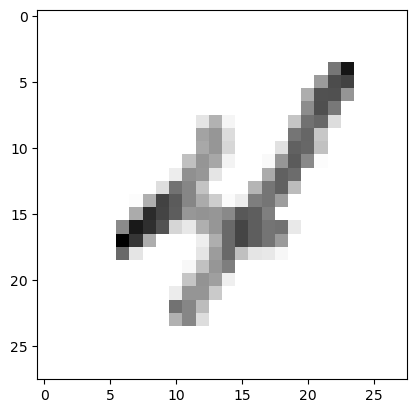

In [85]:
plt.imshow(x_train[9],cmap=plt.cm.binary) 
plt.show()

## Defining the architecture of the neural network
**Sequential**: Builds a model by stacking layers sequentially.

**Flatten**: Converts each 28x28 pixel image into a 1D array of 784 pixels.

**Dense**: Fully connected (dense) layers.
First layer: 128 neurons with the ReLU activation function for non-linearity.
Second layer: 10 neurons with the softmax activation function to output probabilities for 10 classes (digits 0–9).

In [45]:
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten 2D images into 1D vectors
    Dense(128, activation='relu'), # Hidden layer
    Dense(10, activation='softmax') # Output layer for 10 classes
])

C:\Users\Bimarsh\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Choosing an Optimizer
Optimizer controlsthe learning process. **Adam** is an adaptive optimizer combining momentum and adpative learning rates, often providing faster convergence.

**loss** measures the error between the predicted and true labels. **sparse_categorical_entropy** is suitable for multi-class classification when labels are integers not one-hot encoded.
metric tracks performance

In [47]:
optimizer = Adam(learning_rate=0.001)  # Change to SGD(learning_rate=0.01) to compare
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [49]:
history = model.fit(x_train, y_train, epochs=5, validation_split=0.2)
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accutacy}")

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 32s 19ms/step - accuracy: 0.8655 - loss: 0.4714 - val_accuracy: 0.9542 - val_loss: 0.1603
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 18ms/step - accuracy: 0.9618 - loss: 0.1316 - val_accuracy: 0.9671 - val_loss: 0.1096
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9750 - loss: 0.0818 - val_accuracy: 0.9732 - val_loss: 0.0934
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9822 - loss: 0.0597 - val_accuracy: 0.9737 - val_loss: 0.0902
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9860 - loss: 0.0462 - val_accuracy: 0.9738 - val_loss: 0.0876
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9725 - loss: 0.0939
Test accuracy: 0.9753000140190125


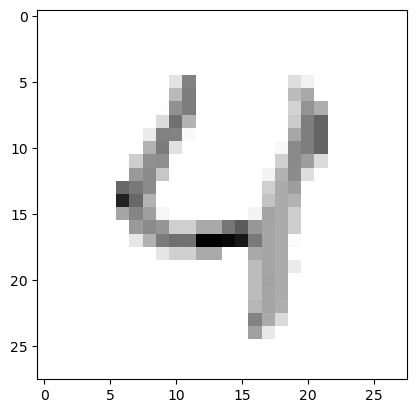

In [87]:
def display(img):
    plt.imshow(img,cmap=plt.cm.binary) 
    plt.show()
display(x_test[4])

In [93]:
#Predicting using the model
predictions = model.predict([x_test])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


label ->  4
prediction ->  4


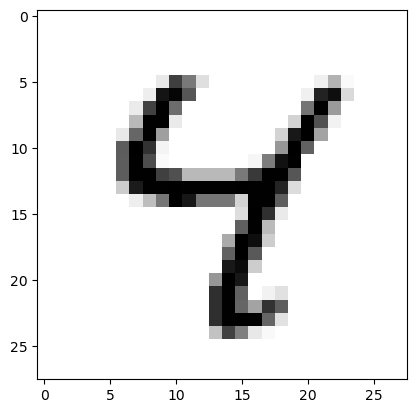

In [107]:
print('label -> ',y_test[6]) 
print('prediction -> ',np.argmax(predictions[6])) 
  
display(x_test[6])